In [76]:
!pip install alibi

  Using cached alibi-0.5.6-py3-none-any.whl (232 kB)
  Using cached slicer-0.0.3-py3-none-any.whl (11 kB)


  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.7
    Uninstalling slicer-0.0.7:
      Successfully uninstalled slicer-0.0.7


In [77]:
!pip install alibi[ray]

  Using cached ray-1.2.0-cp38-cp38-macosx_10_13_x86_64.whl (47.7 MB)
  Using cached colorful-0.5.4-py2.py3-none-any.whl (201 kB)
  Using cached gpustat-0.6.0-py3-none-any.whl
  Using cached redis-3.5.3-py2.py3-none-any.whl (72 kB)
  Using cached aiohttp_cors-0.7.0-py3-none-any.whl (27 kB)
  Using cached opencensus-0.7.12-py2.py3-none-any.whl (127 kB)
  Using cached aioredis-1.3.1-py3-none-any.whl (65 kB)
     |████████████████████████████████| 1.6 MB 2.8 MB/s eta 0:00:01
  Using cached slicer-0.0.3-py3-none-any.whl (11 kB)


  Attempting uninstall: slicer
    Found existing installation: slicer 0.0.7
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/opt/anaconda3/lib/python3.8/site-packages/slicer-0.0.7.dist-info/RECORD'



In [78]:
!pip install tensorflow_datasets

In [79]:
!pip install keras

In [80]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
batch_size = 128
num_classes = 10
epochs = 12


In [82]:
# input image dimensions
img_rows, img_cols = 28, 28


In [83]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [84]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [85]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [86]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [87]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [88]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [89]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - ETA: 0s - loss: 2.2824 - acc: 0.1642

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


60000/60000 [==============================] - 104s 2ms/sample - loss: 2.2824 - acc: 0.1642 - val_loss: 2.2377 - val_acc: 0.3929
Epoch 2/12
60000/60000 [==============================] - 103s 2ms/sample - loss: 2.2102 - acc: 0.2949 - val_loss: 2.1473 - val_acc: 0.5691
Epoch 3/12
60000/60000 [==============================] - 102s 2ms/sample - loss: 2.1151 - acc: 0.4052 - val_loss: 2.0250 - val_acc: 0.6768
Epoch 4/12
60000/60000 [==============================] - 76s 1ms/sample - loss: 1.9880 - acc: 0.4843 - val_loss: 1.8628 - val_acc: 0.7116
Epoch 5/12
60000/60000 [==============================] - 86s 1ms/sample - loss: 1.8262 - acc: 0.5441 - val_loss: 1.6609 - val_acc: 0.7299
Epoch 6/12
60000/60000 [==============================] - 111s 2ms/sample - loss: 1.6426 - acc: 0.5872 - val_loss: 1.4391 - val_acc: 0.7552
Epoch 7/12
60000/60000 [==============================] - 89s 1ms/sample - loss: 1.4554 - acc: 0.6252 - val_loss: 1.2287 - val_acc: 0.7825
Epoch 8/12
60000/60000 [==========

In [90]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6671135921955109
Test accuracy: 0.8474


In [91]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior() # run this if you get tensor related error

In [92]:
background = x_train[np.random.choice(x_train.shape[0],100, replace=False)]
explainer = shap.DeepExplainer(model,background)

In [93]:
shap_values = explainer.shap_values(x_test[1:5])

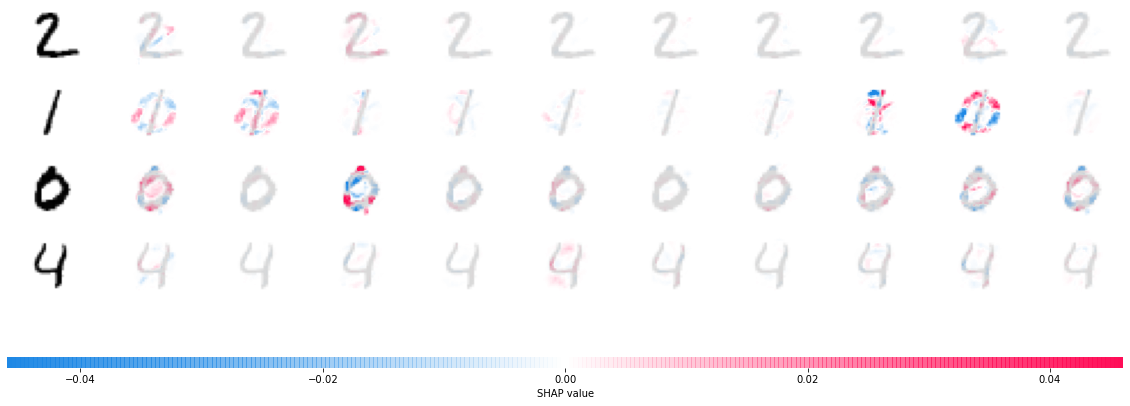

In [94]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

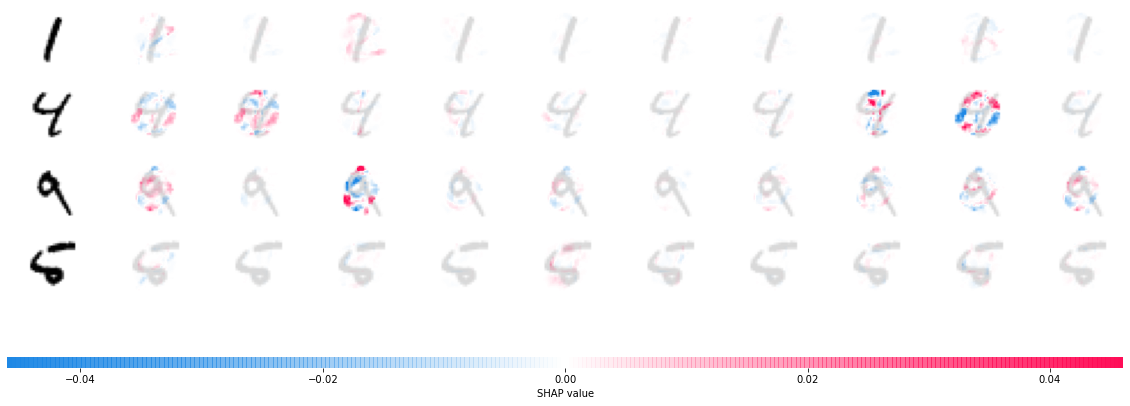

In [99]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[5:9])

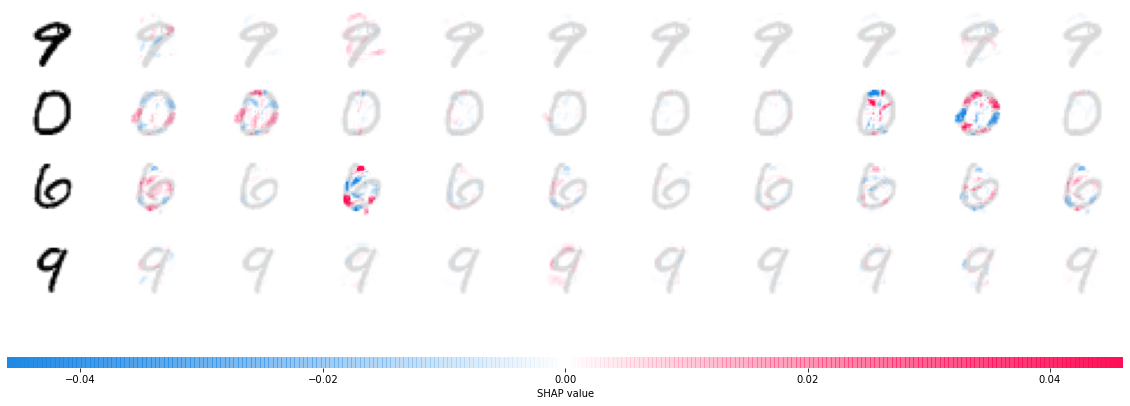

In [101]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[9:13])

In [102]:
# another sample showing the cifar10 dataset

In [103]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

In [104]:
import matplotlib.pyplot as plt

#from quiver_engine import server
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

In [105]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [106]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [107]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 


In [108]:
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [109]:
# network

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               4194816   
_________________________________________________________________
activation_1 (Activation)    (None, 512)              

In [110]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])

In [111]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 41s 1ms/sample - loss: 1.7235 - acc: 0.3936 - val_loss: 1.4818 - val_acc: 0.4685
Epoch 2/20
40000/40000 [==============================] - 51s 1ms/sample - loss: 1.3518 - acc: 0.5213 - val_loss: 1.2663 - val_acc: 0.5528
Epoch 3/20
40000/40000 [==============================] - 46s 1ms/sample - loss: 1.2150 - acc: 0.5724 - val_loss: 1.2444 - val_acc: 0.5613
Epoch 4/20
40000/40000 [==============================] - 35s 873us/sample - loss: 1.1251 - acc: 0.6053 - val_loss: 1.1525 - val_acc: 0.6001
Epoch 5/20
40000/40000 [==============================] - 36s 905us/sample - loss: 1.0573 - acc: 0.6301 - val_loss: 1.0990 - val_acc: 0.6253
Epoch 6/20
40000/40000 [==============================] - 35s 865us/sample - loss: 0.9951 - acc: 0.6513 - val_loss: 1.1213 - val_acc: 0.6220
Epoch 7/20
40000/40000 [==============================] - 35s 873us/sample - loss: 0.9440 - acc: 0.6684 - val_

In [112]:
print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Testing...

Test score: 1.0546507610321045
Test accuracy: 0.6582


In [113]:
#save model
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)
model.save_weights('cifar10_weights.h5', overwrite=True)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


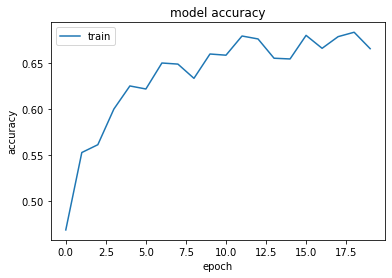

In [115]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

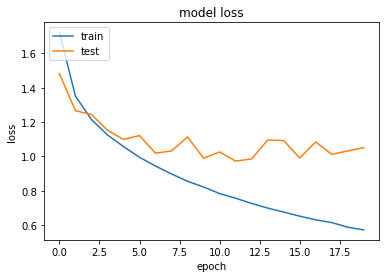

In [116]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [117]:
background = X_train[np.random.choice(X_train.shape[0],100, replace=False)]
explainer = shap.DeepExplainer(model,background)

In [123]:
shap_values = explainer.shap_values(X_test[10:15])

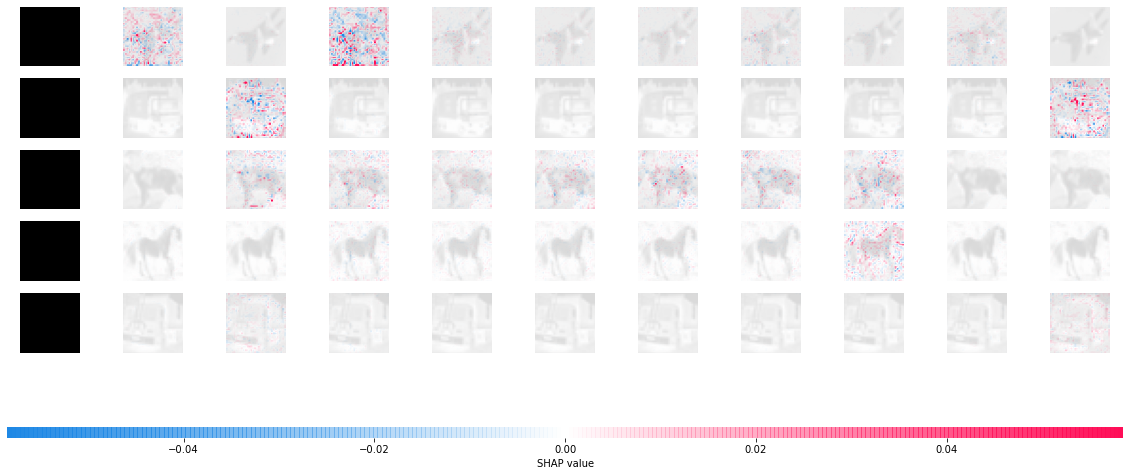

In [124]:
# plot the feature attributions
shap.image_plot(shap_values, -X_test[10:15])

In [132]:
import pandas as pd
pd.DataFrame(model.predict_classes(X_test)).head(10)

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


,0
0,3
1,8
2,8
3,0
4,6
5,6
6,1
7,6
8,3
9,1


In [136]:
import pandas as pd

pd.DataFrame(np.round(model.predict_proba(X_test),3)).head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.000,0.001,0.002,0.928,0.007,0.053,0.000,0.000,0.008,0.000
1,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.995,0.000
2,0.164,0.013,0.005,0.001,0.001,0.000,0.000,0.001,0.797,0.019
3,0.661,0.002,0.105,0.001,0.003,0.000,0.001,0.000,0.226,0.000
4,0.000,0.000,0.037,0.073,0.289,0.002,0.598,0.000,0.000,0.000
5,0.001,0.000,0.035,0.033,0.023,0.024,0.877,0.003,0.000,0.003
6,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,0.009,0.000,0.036,0.001,0.000,0.000,0.954,0.000,0.000,0.000
8,0.003,0.000,0.029,0.665,0.121,0.147,0.008,0.025,0.001,0.000
9,0.001,0.936,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.061


In [140]:
# Structured data classification problem

In [141]:
from tensorflow import keras
from sklearn.model_selection import cross_val_score, KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [142]:
feature_names = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality",
]


In [143]:
red_wine_data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                            names=feature_names, sep=";", header=1)
white_wine_data = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', 
    names=feature_names, sep=";", header=1)


In [144]:
wine_data = red_wine_data.append(white_wine_data)
wine_features = wine_data[feature_names].drop('quality', axis=1).values
wine_quality = wine_data['quality'].values


In [145]:
scaler = StandardScaler().fit(wine_features)
wine_features = scaler.transform(wine_features)

In [154]:
model = Sequential()
model.add(Dense(1024, input_dim=11, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(64,  activation='tanh'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [155]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1024)              12288     
_________________________________________________________________
dense_25 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_26 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 65        
Total params: 569,985
Trainable params: 569,985
Non-trainable params: 0
_________________________________________________________________


In [156]:
history = model.fit(wine_features, wine_quality, 
                    batch_size=BATCH_SIZE, 
                    epochs=NB_EPOCH, 
                    validation_split=VALIDATION_SPLIT,  
                    verbose=VERBOSE)


Train on 5196 samples, validate on 1299 samples
Epoch 1/20
4608/5196 [=========================>....] - ETA: 0s - loss: 13.2767 - acc: 0.0000e+00

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


5196/5196 [==============================] - 1s 190us/sample - loss: 11.9451 - acc: 0.0000e+00 - val_loss: 1.2575 - val_acc: 0.0000e+00
Epoch 2/20
5196/5196 [==============================] - 0s 87us/sample - loss: 0.8813 - acc: 0.0000e+00 - val_loss: 0.6609 - val_acc: 0.0000e+00
Epoch 3/20
5196/5196 [==============================] - 0s 88us/sample - loss: 0.6146 - acc: 0.0000e+00 - val_loss: 0.6251 - val_acc: 0.0000e+00
Epoch 4/20
5196/5196 [==============================] - 0s 86us/sample - loss: 0.5652 - acc: 0.0000e+00 - val_loss: 0.4649 - val_acc: 0.0000e+00
Epoch 5/20
5196/5196 [==============================] - 1s 116us/sample - loss: 0.5279 - acc: 0.0000e+00 - val_loss: 0.4881 - val_acc: 0.0000e+00
Epoch 6/20
5196/5196 [==============================] - 1s 111us/sample - loss: 0.5139 - acc: 0.0000e+00 - val_loss: 0.4943 - val_acc: 0.0000e+00
Epoch 7/20
5196/5196 [==============================] - 0s 86us/sample - loss: 0.5003 - acc: 0.0000e+00 - val_loss: 0.4828 - val_acc: 0.0

In [157]:
background = wine_features[np.random.choice(wine_features.shape[0],100, replace=False)]
explainer = shap.DeepExplainer(model,background)

In [161]:
shap_values = explainer.shap_values(wine_features)

In [167]:
pd.DataFrame(np.array(shap_values).reshape(6495,11))

,0,1,2,3,4,5,6,7,8,9,10
0,0.066047,-0.771672,-0.075351,-0.055202,-0.123719,0.039154,0.237973,-0.117355,0.007136,0.135428,-0.145766
1,0.086688,-0.551000,-0.028156,-0.086873,-0.021922,-0.056542,0.300781,-0.158880,0.045402,0.178283,-0.158946
2,0.340038,0.081146,-0.016690,-0.250362,0.193835,-0.166663,0.318158,-0.391294,0.029644,0.090332,-0.150456
3,0.045048,-0.485293,-0.006851,-0.084920,-0.013041,-0.161682,0.211256,-0.259939,0.067283,0.103285,-0.242833
4,0.043469,-0.406420,-0.029543,-0.099369,-0.018534,-0.117917,0.211543,-0.263839,0.085190,0.098574,-0.244423
...,...,...,...,...,...,...,...,...,...,...,...
6490,-0.136955,0.106881,-0.008911,-0.265358,-0.066318,0.018140,0.042429,0.500788,0.071799,-0.058543,0.097819
6491,-0.085998,0.024876,0.053975,0.074278,-0.024877,0.208259,-0.227676,-0.098920,-0.053289,-0.025890,-0.241086
6492,-0.037169,0.015518,-0.124957,-0.275628,-0.030402,0.087213,-0.025765,0.289469,-0.160039,-0.066687,-0.119787
6493,-0.171510,0.069156,-0.007539,-0.331065,-0.025593,-0.033326,0.041701,0.959326,0.058905,-0.185193,0.420265


In [164]:
np.round(model.predict(wine_features),0)

array([[5.],
       [5.],
       [6.],
       ...,
       [5.],
       [7.],
       [6.]], dtype=float32)